In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/DATASET IOT"
path="/content/drive/MyDrive/DATASET IOT/trafficData02112014.csv"
df=pd.read_csv(path)
df.head()

183063.csv  reduce_data.csv  trafficData02112014.csv  trafficMetaData.csv


,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,66,56,668,66,2014-02-13T11:30:00,7,190000,158324
1,OK,69,53,668,69,2014-02-13T11:35:00,5,190449,158324
2,OK,69,53,668,69,2014-02-13T11:40:00,6,190898,158324
3,OK,70,52,668,70,2014-02-13T11:45:00,3,191347,158324
4,OK,64,57,668,64,2014-02-13T11:50:00,6,191796,158324


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25097093 entries, 0 to 25097092
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   status              object
 1   avgMeasuredTime     int64 
 2   avgSpeed            int64 
 3   extID               int64 
 4   medianMeasuredTime  int64 
 5   TIMESTAMP           object
 6   vehicleCount        int64 
 7   _id                 int64 
 8   REPORT_ID           int64 
dtypes: int64(7), object(2)
memory usage: 1.7+ GB


In [ ]:
tab = [190799, 209960, 190825, 209986, 209880, 158684, 209933, 209986, 209854, 209907, 158655, 209960]
resultats = []
for i in tab:
    filtered_tab = df[df['REPORT_ID'].isin(tab)]
    resultats.append(filtered_tab)
data = pd.concat(resultats)
data

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
340605,OK,217,111,896,217,2014-02-13T11:30:00,12,190228,158655
340606,OK,226,106,896,226,2014-02-13T11:35:00,12,190677,158655
340607,OK,227,106,896,227,2014-02-13T11:40:00,11,191126,158655
340608,OK,219,110,896,219,2014-02-13T11:45:00,12,191575,158655
340609,OK,207,116,896,207,2014-02-13T11:50:00,10,192024,158655
...,...,...,...,...,...,...,...,...,...
25018675,OK,118,80,985,118,2014-11-13T10:20:00,0,32507714,209986
25018676,OK,118,80,985,118,2014-11-13T10:25:00,0,32508163,209986
25018677,OK,118,80,985,118,2014-11-13T10:30:00,0,32508564,209986
25018678,OK,118,80,985,118,2014-11-13T10:35:00,0,32508999,209986


<ipython-input-6-ee50fb69082f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-6-ee50fb69082f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


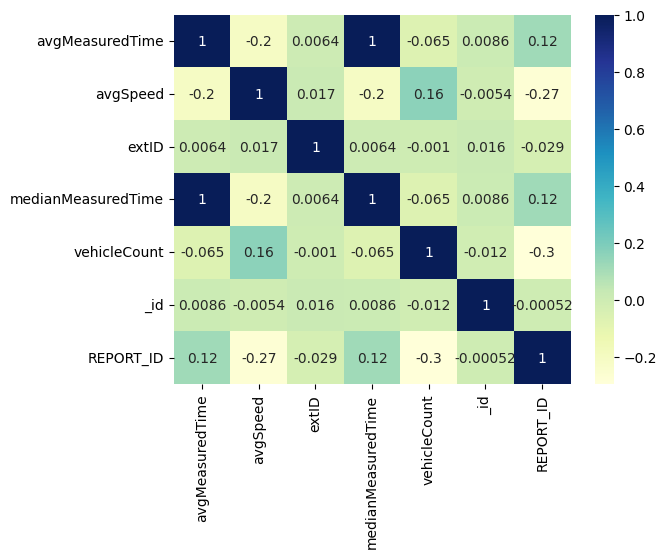

In [ ]:
df.corr()
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [ ]:
df.drop(columns=['extID','_id','status','medianMeasuredTime'],inplace=True)
df.head()

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID
0,66,56,2014-02-13T11:30:00,7,158324
1,69,53,2014-02-13T11:35:00,5,158324
2,69,53,2014-02-13T11:40:00,6,158324
3,70,52,2014-02-13T11:45:00,3,158324
4,64,57,2014-02-13T11:50:00,6,158324


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25097093 entries, 0 to 25097092
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   avgMeasuredTime  int64 
 1   avgSpeed         int64 
 2   TIMESTAMP        object
 3   vehicleCount     int64 
 4   REPORT_ID        int64 
dtypes: int64(4), object(1)
memory usage: 957.4+ MB


In [ ]:
df['REPORT_ID'].unique()

array([158324, 158355, 158386, 158415, 158446, 158475, 158505, 158536,
       158565, 158595, 158624, 158655, 158684, 158715, 158744, 158776,
       158805, 158836, 158865, 158895, 158924, 158954, 158983, 159014,
       159043, 171572, 171969, 172156, 172329, 172602, 173011, 173118,
       173225, 178548, 178600, 178713, 178739, 178767, 178793, 178821,
       178847, 178875, 178901, 178929, 178955, 178983, 179009, 179038,
       179064, 179093, 179119, 179148, 179174, 179202, 179228, 179256,
       179282, 179310, 179336, 179364, 179390, 179418, 179444, 180547,
       180573, 180601, 180627, 180655, 180681, 180709, 180735, 180764,
       180790, 180818, 180844, 180872, 180898, 180926, 180952, 180980,
       181006, 181034, 181060, 181088, 181114, 181142, 181168, 181197,
       181223, 181251, 181277, 181305, 181331, 182657, 182683, 182712,
       182738, 182766, 182792, 182820, 182846, 182875, 182901, 182929,
       182955, 182983, 183009, 183037, 183063, 183091, 183117, 184595,
      

In [ ]:
data[['date', 'Time']] = data.TIMESTAMP.str.split("T", expand = True)
data

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time
340605,217,111,2014-02-13T11:30:00,12,158655,2014-02-13,11:30:00
340606,226,106,2014-02-13T11:35:00,12,158655,2014-02-13,11:35:00
340607,227,106,2014-02-13T11:40:00,11,158655,2014-02-13,11:40:00
340608,219,110,2014-02-13T11:45:00,12,158655,2014-02-13,11:45:00
340609,207,116,2014-02-13T11:50:00,10,158655,2014-02-13,11:50:00
...,...,...,...,...,...,...,...
25018675,118,80,2014-11-13T10:20:00,0,209986,2014-11-13,10:20:00
25018676,118,80,2014-11-13T10:25:00,0,209986,2014-11-13,10:25:00
25018677,118,80,2014-11-13T10:30:00,0,209986,2014-11-13,10:30:00
25018678,118,80,2014-11-13T10:35:00,0,209986,2014-11-13,10:35:00


In [ ]:
data[['year', 'month','day']] = data.date.str.split("-", expand = True)
data

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time,year,month,day
340605,217,111,2014-02-13T11:30:00,12,158655,2014-02-13,11:30:00,2014,02,13
340606,226,106,2014-02-13T11:35:00,12,158655,2014-02-13,11:35:00,2014,02,13
340607,227,106,2014-02-13T11:40:00,11,158655,2014-02-13,11:40:00,2014,02,13
340608,219,110,2014-02-13T11:45:00,12,158655,2014-02-13,11:45:00,2014,02,13
340609,207,116,2014-02-13T11:50:00,10,158655,2014-02-13,11:50:00,2014,02,13
...,...,...,...,...,...,...,...,...,...,...
25018675,118,80,2014-11-13T10:20:00,0,209986,2014-11-13,10:20:00,2014,11,13
25018676,118,80,2014-11-13T10:25:00,0,209986,2014-11-13,10:25:00,2014,11,13
25018677,118,80,2014-11-13T10:30:00,0,209986,2014-11-13,10:30:00,2014,11,13
25018678,118,80,2014-11-13T10:35:00,0,209986,2014-11-13,10:35:00,2014,11,13


In [ ]:
data[['hour', 'min','sec']] = data.Time.str.split(":", expand = True)
data

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time,year,month,day,hour,min,sec
340605,217,111,2014-02-13T11:30:00,12,158655,2014-02-13,11:30:00,2014,02,13,11,30,00
340606,226,106,2014-02-13T11:35:00,12,158655,2014-02-13,11:35:00,2014,02,13,11,35,00
340607,227,106,2014-02-13T11:40:00,11,158655,2014-02-13,11:40:00,2014,02,13,11,40,00
340608,219,110,2014-02-13T11:45:00,12,158655,2014-02-13,11:45:00,2014,02,13,11,45,00
340609,207,116,2014-02-13T11:50:00,10,158655,2014-02-13,11:50:00,2014,02,13,11,50,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25018675,118,80,2014-11-13T10:20:00,0,209986,2014-11-13,10:20:00,2014,11,13,10,20,00
25018676,118,80,2014-11-13T10:25:00,0,209986,2014-11-13,10:25:00,2014,11,13,10,25,00
25018677,118,80,2014-11-13T10:30:00,0,209986,2014-11-13,10:30:00,2014,11,13,10,30,00
25018678,118,80,2014-11-13T10:35:00,0,209986,2014-11-13,10:35:00,2014,11,13,10,35,00


In [ ]:
data['hour']=data['hour'].astype(int)
data['min']=data['min'].astype(int)
data['sec']=data['sec'].astype(int)
data['year']=data['year'].astype(int)
data['month']=data['month'].astype(int)
data['day']=data['day'].astype(int)
data


,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time,year,month,day,hour,min,sec
340605,217,111,2014-02-13T11:30:00,12,158655,2014-02-13,11:30:00,2014,2,13,11,30,0
340606,226,106,2014-02-13T11:35:00,12,158655,2014-02-13,11:35:00,2014,2,13,11,35,0
340607,227,106,2014-02-13T11:40:00,11,158655,2014-02-13,11:40:00,2014,2,13,11,40,0
340608,219,110,2014-02-13T11:45:00,12,158655,2014-02-13,11:45:00,2014,2,13,11,45,0
340609,207,116,2014-02-13T11:50:00,10,158655,2014-02-13,11:50:00,2014,2,13,11,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25018675,118,80,2014-11-13T10:20:00,0,209986,2014-11-13,10:20:00,2014,11,13,10,20,0
25018676,118,80,2014-11-13T10:25:00,0,209986,2014-11-13,10:25:00,2014,11,13,10,25,0
25018677,118,80,2014-11-13T10:30:00,0,209986,2014-11-13,10:30:00,2014,11,13,10,30,0
25018678,118,80,2014-11-13T10:35:00,0,209986,2014-11-13,10:35:00,2014,11,13,10,35,0


In [ ]:
data['REPORT_ID']=data['REPORT_ID'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6624288 entries, 340605 to 25018679
Data columns (total 13 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   avgMeasuredTime  int64 
 1   avgSpeed         int64 
 2   TIMESTAMP        object
 3   vehicleCount     int64 
 4   REPORT_ID        object
 5   date             object
 6   Time             object
 7   year             int64 
 8   month            int64 
 9   day              int64 
 10  hour             int64 
 11  min              int64 
 12  sec              int64 
dtypes: int64(9), object(4)
memory usage: 707.6+ MB


In [ ]:
dataff = pd.DataFrame(columns=df.columns)
#from 5min to 1hour
for m in data['month'].unique():
    for d in data['day'].unique():
        for h in data['hour'].unique():
            DDD=data[(data['hour'] == h)&(data['day'] == d)&(data['month'] == m)]
            if DDD['avgSpeed'].mean() > 0:
                #print([[DDD['avgMeasuredTime'].mean(),DDD['avgSpeed'].mean(),DDD['vehicleCount'].sum(),DDD['M'].mean(),DDD['D'].mean(),DDD['H'].mean()]])
                df4=pd.DataFrame([[DDD['avgMeasuredTime'].mean(),DDD['avgSpeed'].mean(),DDD['TIMESTAMP'].values[0],
                                   DDD['vehicleCount'].sum(),DDD['REPORT_ID'].values[0],DDD['month'].mean(),DDD['day'].mean(),DDD['hour'].mean()]],
                                     columns=['avgMeasuredTime','avgSpeed','TIMESTAMP','vehicleCount','REPORT_ID','month','day','hour'])
                dataff=pd.concat([dataff,df4],ignore_index=True)

#extract datetime from timestamp
date_time = pd.to_datetime(dataff.pop('TIMESTAMP'), format='%Y-%m-%dT%H:%M:%S')


In [ ]:
data=dataff
data

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,vehicleCount,_id,REPORT_ID,month,day,hour
0,NaN,145.550000,75.716667,NaN,NaN,3228,NaN,158655,2.0,13.0,11.0
1,NaN,144.325000,76.483333,NaN,NaN,5304,NaN,158655,2.0,13.0,12.0
2,NaN,141.416667,77.875000,NaN,NaN,5460,NaN,158655,2.0,13.0,13.0
3,NaN,143.575000,76.266667,NaN,NaN,6564,NaN,158655,2.0,13.0,14.0
4,NaN,143.550000,76.316667,NaN,NaN,5520,NaN,158655,2.0,13.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
5069,NaN,152.425000,73.208333,NaN,NaN,8340,NaN,158655,11.0,12.0,6.0
5070,NaN,142.475000,77.308333,NaN,NaN,7416,NaN,158655,11.0,12.0,7.0
5071,NaN,139.793103,78.043103,NaN,NaN,4236,NaN,158655,11.0,12.0,8.0
5072,NaN,144.186916,73.411215,NaN,NaN,4068,NaN,158655,11.0,12.0,9.0


In [ ]:
data.drop(columns=['extID','_id','status','medianMeasuredTime'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074 entries, 0 to 5073
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avgMeasuredTime  5074 non-null   float64
 1   avgSpeed         5074 non-null   float64
 2   vehicleCount     5074 non-null   object 
 3   REPORT_ID        5074 non-null   object 
 4   month            5074 non-null   float64
 5   day              5074 non-null   float64
 6   hour             5074 non-null   float64
dtypes: float64(5), object(2)
memory usage: 277.6+ KB


In [ ]:
data['hour']=data['hour'].astype(int)
data['month']=data['month'].astype(int)
data['day']=data['day'].astype(int)
data['REPORT_ID']=data['REPORT_ID'].astype(int)
data['vehicleCount']=data['vehicleCount'].astype(int)
data

,avgMeasuredTime,avgSpeed,vehicleCount,REPORT_ID,month,day,hour
0,145.550000,75.716667,3228,158655,2,13,11
1,144.325000,76.483333,5304,158655,2,13,12
2,141.416667,77.875000,5460,158655,2,13,13
3,143.575000,76.266667,6564,158655,2,13,14
4,143.550000,76.316667,5520,158655,2,13,15
...,...,...,...,...,...,...,...
5069,152.425000,73.208333,8340,158655,11,12,6
5070,142.475000,77.308333,7416,158655,11,12,7
5071,139.793103,78.043103,4236,158655,11,12,8
5072,144.186916,73.411215,4068,158655,11,12,9


In [ ]:
!ls "/content/drive/MyDrive/DATASET IOT"
path="/content/drive/MyDrive/DATASET IOT/trafficMetaData.csv"
meta=pd.read_csv(path)
meta.head()

183063.csv  reduce_data.csv  trafficData02112014.csv  trafficMetaData.csv


,POINT_1_STREET,DURATION_IN_SEC,POINT_1_NAME,POINT_1_CITY,POINT_2_NAME,POINT_2_LNG,POINT_2_STREET,NDT_IN_KMH,POINT_2_POSTAL_CODE,POINT_2_COUNTRY,...,POINT_2_CITY,extID,ROAD_TYPE,POINT_1_LNG,REPORT_ID,POINT_1_COUNTRY,DISTANCE_IN_METERS,REPORT_NAME,RBA_ID,_id
0,Søftenvej,77,4364,Aarhus,4349,10.161038,Søftenvej,70,8200,Denmark,...,Aarhus,179,MAJOR_ROAD,10.139696,158895,Denmark,1505,AAR_BT_0020 4364 4349,161062,1586
1,Grenåvej,65,4582,Risskov,4581,10.219086,Grenåvej,44,8240,Denmark,...,Risskov,194,MAJOR_ROAD,10.218304,178600,Denmark,797,AAR_BT_0101 4582 4581,178660,1601
2,Skanderborgvej,84,3987,Aarhus,2651,10.157659,Viby Ringvej,35,8260,Denmark,...,Aarhus,324,MAJOR_ROAD,10.166163,187509,Denmark,823,AAR_BT_0231 3987 2651,189702,1731
3,Grenåvej,55,4572,Risskov,4581,10.218878,Grenåvej,53,8240,Denmark,...,Risskov,383,MAJOR_ROAD,10.228594,190744,Denmark,813,AAR_BT_0291 4572 4581,192392,1790
4,Holmstrupgårdvej,91,4337,Aarhus,4336,10.120842,Holmstrupgårdvej,40,8210,Denmark,...,Aarhus,436,MAJOR_ROAD,10.119669,195041,Denmark,1015,AAR_BT_0356 4337 4336,229156,1843


In [ ]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POINT_1_STREET         446 non-null    object 
 1   DURATION_IN_SEC        449 non-null    int64  
 2   POINT_1_NAME           449 non-null    int64  
 3   POINT_1_CITY           449 non-null    object 
 4   POINT_2_NAME           449 non-null    int64  
 5   POINT_2_LNG            449 non-null    float64
 6   POINT_2_STREET         448 non-null    object 
 7   NDT_IN_KMH             449 non-null    int64  
 8   POINT_2_POSTAL_CODE    449 non-null    int64  
 9   POINT_2_COUNTRY        449 non-null    object 
 10  POINT_1_STREET_NUMBER  449 non-null    object 
 11  ORGANISATION           449 non-null    object 
 12  POINT_1_LAT            449 non-null    float64
 13  POINT_2_LAT            449 non-null    float64
 14  POINT_1_POSTAL_CODE    449 non-null    int64  
 15  POINT_

In [ ]:
meta.shape

(449, 26)

In [ ]:
meta['REPORT_ID'].unique

<bound method Series.unique of 0      158895
1      178600
2      187509
3      190744
4      195041
        ...  
444    209960
445    209986
446    210013
447    210040
448    210173
Name: REPORT_ID, Length: 449, dtype: int64>

In [ ]:
list(df['REPORT_ID'].unique()).sort()==list(meta['REPORT_ID'].unique()).sort()

True

In [ ]:
meta['POINT_2_NAME'].nunique()

136

In [ ]:
meta['POINT_2_NAME'].unique()

array([4349, 4581, 2651, 4336, 2655, 4345, 4566, 4564, 3988, 3156, 4347,
       4342, 4373, 4327, 4346, 4361, 4364, 2653, 3192, 3187, 4341, 4362,
       2661, 4331, 2658, 4357, 3990, 4330, 4337, 3979, 3155, 3181, 3150,
       4567, 4565, 4329, 3989, 2654, 3158, 4563, 4375, 4372, 4371, 4378,
       2652, 3183, 4549, 3190, 3189, 3199, 3977, 3191, 3193, 4350, 3154,
       2660, 2656, 4360, 4358, 4548, 2659, 4569, 4578, 4340, 4374, 4568,
       4559, 4368, 4334, 4556, 2657, 4550, 4552, 3197, 3983, 3159, 4379,
       4554, 4582, 4561, 4562, 3987, 3985, 3152, 4338, 4343, 4344, 4551,
       4325, 4328, 3976, 4363, 4572, 4351, 4335, 4339, 3200, 3984, 3182,
       3196, 3157, 3198, 3978, 3186, 4322, 4348, 4359, 3194, 3986, 3163,
       4557, 4570, 4555, 4367, 3202, 4353, 4355, 4354, 4332, 4356, 4352,
       4553, 4377, 4376, 4370, 4558, 4560, 4365, 4333, 3195, 3982, 3201,
       4326, 4321, 4320, 4323])

In [ ]:
meta['POINT_1_NAME'].unique()

array([4364, 4582, 3987, 4572, 4337, 4331, 4328, 4373, 4361, 2652, 3193,
       4335, 4566, 4346, 4327, 4564, 4349, 2654, 3191, 4374, 4357, 4351,
       4330, 2657, 2651, 4353, 3979, 4554, 3182, 3990, 4565, 4567, 4363,
       2655, 2653, 2656, 4550, 3989, 4371, 4372, 3197, 3200, 3984, 3152,
       4339, 4560, 4367, 3187, 3150, 2661, 3156, 4362, 3155, 3154, 3158,
       4365, 4556, 2660, 4578, 4340, 3192, 3988, 4548, 3986, 4568, 4334,
       4563, 3983, 3183, 3977, 4552, 4553, 4559, 3189, 2658, 3159, 3199,
       4350, 3181, 4549, 4562, 4344, 3190, 4581, 4338, 4551, 4561, 4352,
       3157, 4341, 4325, 4343, 4345, 4332, 4347, 3196, 3985, 3198, 2659,
       3194, 3978, 3186, 4320, 4359, 4348, 4326, 3976, 4557, 3195, 4375,
       4378, 3163, 4333, 4342, 4570, 4558, 4329, 4354, 4356, 4336, 4569,
       4379, 4376, 4377, 4358, 4368, 4370, 4555, 4360, 4355, 3982, 4323,
       4322, 4321, 3202, 3201])

In [ ]:
i=209960
p3=meta[meta['REPORT_ID']==i]
p3

,POINT_1_STREET,DURATION_IN_SEC,POINT_1_NAME,POINT_1_CITY,POINT_2_NAME,POINT_2_LNG,POINT_2_STREET,NDT_IN_KMH,POINT_2_POSTAL_CODE,POINT_2_COUNTRY,...,POINT_2_CITY,extID,ROAD_TYPE,POINT_1_LNG,REPORT_ID,POINT_1_COUNTRY,DISTANCE_IN_METERS,REPORT_NAME,RBA_ID,_id
444,Mejlbyvej,116,4355,Hjortshøj,4327,10.246154,Djurslandmotorvejen,78,8520,Denmark,...,Lystrup,599,MAJOR_ROAD,10.261365,209960,Denmark,2504,AAR_BT_0519 4355 4327,229663,2006


In [ ]:

#i=158655
i=209960
p1=meta[meta['REPORT_ID']==i]['POINT_1_NAME']
p2=meta[meta['REPORT_ID']==i]['POINT_2_NAME']
print(p1)
print(p2)

n1=meta[meta['POINT_1_NAME']==p1.values[0]]
n2=meta[meta['POINT_2_NAME']==p1.values[0]]

print(n1)
print(n2)
print('*************')
n3=meta[meta['POINT_1_NAME']==p2.values[0]]
n4=meta[meta['POINT_1_NAME']==p2.values[0]]

print(n3)
print(n4)


444    4355
Name: POINT_1_NAME, dtype: int64
444    4327
Name: POINT_2_NAME, dtype: int64
    POINT_1_STREET  DURATION_IN_SEC  POINT_1_NAME POINT_1_CITY  POINT_2_NAME  \
341      Mejlbyvej              169          4355    Hjortshøj          4352   
444      Mejlbyvej              116          4355    Hjortshøj          4327   

     POINT_2_LNG       POINT_2_STREET  NDT_IN_KMH  POINT_2_POSTAL_CODE  \
341    10.267762            Mejlbyvej          53                 8250   
444    10.246154  Djurslandmotorvejen          78                 8520   

    POINT_2_COUNTRY  ... POINT_2_CITY extID   ROAD_TYPE  POINT_1_LNG  \
341         Denmark  ...          Ega   385  MAJOR_ROAD    10.261365   
444         Denmark  ...      Lystrup   599  MAJOR_ROAD    10.261365   

     REPORT_ID POINT_1_COUNTRY DISTANCE_IN_METERS            REPORT_NAME  \
341     190799         Denmark               2502  AAR_BT_0293 4355 4352   
444     209960         Denmark               2504  AAR_BT_0519 4355 4327   



In [ ]:
l1=pd.concat([meta[meta['POINT_1_NAME']==p1.values[0]],meta[meta['POINT_2_NAME']==p1.values[0]]])
l2=pd.concat([ meta[meta['POINT_1_NAME']==p2.values[0]],meta[meta['POINT_2_NAME']==p2.values[0]]])

In [ ]:
l1

,POINT_1_STREET,DURATION_IN_SEC,POINT_1_NAME,POINT_1_CITY,POINT_2_NAME,POINT_2_LNG,POINT_2_STREET,NDT_IN_KMH,POINT_2_POSTAL_CODE,POINT_2_COUNTRY,...,POINT_2_CITY,extID,ROAD_TYPE,POINT_1_LNG,REPORT_ID,POINT_1_COUNTRY,DISTANCE_IN_METERS,REPORT_NAME,RBA_ID,_id
341,Mejlbyvej,169,4355,Hjortshøj,4352,10.267762,Mejlbyvej,53,8250,Denmark,...,Ega,385,MAJOR_ROAD,10.261365,190799,Denmark,2502,AAR_BT_0293 4355 4352,192396,1792
444,Mejlbyvej,116,4355,Hjortshøj,4327,10.246154,Djurslandmotorvejen,78,8520,Denmark,...,Lystrup,599,MAJOR_ROAD,10.261365,209960,Denmark,2504,AAR_BT_0519 4355 4327,229663,2006
249,Mejlbyvej,176,4352,Ega,4355,10.261465,Mejlbyvej,51,8530,Denmark,...,Hjortshøj,386,MAJOR_ROAD,10.267762,190825,Denmark,2502,AAR_BT_0294 4352 4355,192398,1793
445,Djurslandmotorvejen,153,4327,Lystrup,4355,10.261465,Mejlbyvej,62,8530,Denmark,...,Hjortshøj,600,MAJOR_ROAD,10.246299,209986,Denmark,2623,AAR_BT_0520 4327 4355,229665,2007


In [ ]:
l2

,POINT_1_STREET,DURATION_IN_SEC,POINT_1_NAME,POINT_1_CITY,POINT_2_NAME,POINT_2_LNG,POINT_2_STREET,NDT_IN_KMH,POINT_2_POSTAL_CODE,POINT_2_COUNTRY,...,POINT_2_CITY,extID,ROAD_TYPE,POINT_1_LNG,REPORT_ID,POINT_1_COUNTRY,DISTANCE_IN_METERS,REPORT_NAME,RBA_ID,_id
15,Djurslandmotorvejen,118,4327,Lystrup,4346,10.233619,Lystrupvej,49,8520,Denmark,...,Lystrup,596,MAJOR_ROAD,10.246154,209880,Denmark,1595,AAR_BT_0516 4327 4346,229657,2003
422,Djurslandmotorvejen,219,4327,Lystrup,4326,10.145073,15,110,8200,Denmark,...,Aarhus,172,MAJOR_ROAD,10.246154,158684,Denmark,6695,AAR_BT_0013 4327 4326,160779,1579
443,Djurslandmotorvejen,155,4327,Lystrup,4352,10.267762,Mejlbyvej,65,8250,Denmark,...,Ega,598,MAJOR_ROAD,10.246299,209933,Denmark,2782,AAR_BT_0518 4327 4352,229661,2005
445,Djurslandmotorvejen,153,4327,Lystrup,4355,10.261465,Mejlbyvej,62,8530,Denmark,...,Hjortshøj,600,MAJOR_ROAD,10.246299,209986,Denmark,2623,AAR_BT_0520 4327 4355,229665,2007
14,Lystrupvej,94,4346,Lystrup,4327,10.246299,Djurslandmotorvejen,52,8520,Denmark,...,Lystrup,595,MAJOR_ROAD,10.233619,209854,Denmark,1358,AAR_BT_0515 4346 4327,229655,2002
137,Mejlbyvej,185,4352,Ega,4327,10.246154,Djurslandmotorvejen,60,8520,Denmark,...,Lystrup,597,MAJOR_ROAD,10.267762,209907,Denmark,3082,AAR_BT_0517 4352 4327,229659,2004
421,15,219,4326,Aarhus,4327,10.246299,Djurslandmotorvejen,110,8520,Denmark,...,Lystrup,171,MAJOR_ROAD,10.144907,158655,Denmark,6715,AAR_BT_0012 4326 4327,160456,1578
444,Mejlbyvej,116,4355,Hjortshøj,4327,10.246154,Djurslandmotorvejen,78,8520,Denmark,...,Lystrup,599,MAJOR_ROAD,10.261365,209960,Denmark,2504,AAR_BT_0519 4355 4327,229663,2006


In [ ]:
ul1=l1.drop_duplicates()
ul2=l2.drop_duplicates()
ul2

,POINT_1_STREET,DURATION_IN_SEC,POINT_1_NAME,POINT_1_CITY,POINT_2_NAME,POINT_2_LNG,POINT_2_STREET,NDT_IN_KMH,POINT_2_POSTAL_CODE,POINT_2_COUNTRY,...,POINT_2_CITY,extID,ROAD_TYPE,POINT_1_LNG,REPORT_ID,POINT_1_COUNTRY,DISTANCE_IN_METERS,REPORT_NAME,RBA_ID,_id
15,Djurslandmotorvejen,118,4327,Lystrup,4346,10.233619,Lystrupvej,49,8520,Denmark,...,Lystrup,596,MAJOR_ROAD,10.246154,209880,Denmark,1595,AAR_BT_0516 4327 4346,229657,2003
422,Djurslandmotorvejen,219,4327,Lystrup,4326,10.145073,15,110,8200,Denmark,...,Aarhus,172,MAJOR_ROAD,10.246154,158684,Denmark,6695,AAR_BT_0013 4327 4326,160779,1579
443,Djurslandmotorvejen,155,4327,Lystrup,4352,10.267762,Mejlbyvej,65,8250,Denmark,...,Ega,598,MAJOR_ROAD,10.246299,209933,Denmark,2782,AAR_BT_0518 4327 4352,229661,2005
445,Djurslandmotorvejen,153,4327,Lystrup,4355,10.261465,Mejlbyvej,62,8530,Denmark,...,Hjortshøj,600,MAJOR_ROAD,10.246299,209986,Denmark,2623,AAR_BT_0520 4327 4355,229665,2007
14,Lystrupvej,94,4346,Lystrup,4327,10.246299,Djurslandmotorvejen,52,8520,Denmark,...,Lystrup,595,MAJOR_ROAD,10.233619,209854,Denmark,1358,AAR_BT_0515 4346 4327,229655,2002
137,Mejlbyvej,185,4352,Ega,4327,10.246154,Djurslandmotorvejen,60,8520,Denmark,...,Lystrup,597,MAJOR_ROAD,10.267762,209907,Denmark,3082,AAR_BT_0517 4352 4327,229659,2004
421,15,219,4326,Aarhus,4327,10.246299,Djurslandmotorvejen,110,8520,Denmark,...,Lystrup,171,MAJOR_ROAD,10.144907,158655,Denmark,6715,AAR_BT_0012 4326 4327,160456,1578
444,Mejlbyvej,116,4355,Hjortshøj,4327,10.246154,Djurslandmotorvejen,78,8520,Denmark,...,Lystrup,599,MAJOR_ROAD,10.261365,209960,Denmark,2504,AAR_BT_0519 4355 4327,229663,2006


In [ ]:
ul=pd.concat([l1,l2])
ul
#len(ul)
#ul['REPORT_ID'].nunique()

,POINT_1_STREET,DURATION_IN_SEC,POINT_1_NAME,POINT_1_CITY,POINT_2_NAME,POINT_2_LNG,POINT_2_STREET,NDT_IN_KMH,POINT_2_POSTAL_CODE,POINT_2_COUNTRY,...,POINT_2_CITY,extID,ROAD_TYPE,POINT_1_LNG,REPORT_ID,POINT_1_COUNTRY,DISTANCE_IN_METERS,REPORT_NAME,RBA_ID,_id
341,Mejlbyvej,169,4355,Hjortshøj,4352,10.267762,Mejlbyvej,53,8250,Denmark,...,Ega,385,MAJOR_ROAD,10.261365,190799,Denmark,2502,AAR_BT_0293 4355 4352,192396,1792
444,Mejlbyvej,116,4355,Hjortshøj,4327,10.246154,Djurslandmotorvejen,78,8520,Denmark,...,Lystrup,599,MAJOR_ROAD,10.261365,209960,Denmark,2504,AAR_BT_0519 4355 4327,229663,2006
249,Mejlbyvej,176,4352,Ega,4355,10.261465,Mejlbyvej,51,8530,Denmark,...,Hjortshøj,386,MAJOR_ROAD,10.267762,190825,Denmark,2502,AAR_BT_0294 4352 4355,192398,1793
445,Djurslandmotorvejen,153,4327,Lystrup,4355,10.261465,Mejlbyvej,62,8530,Denmark,...,Hjortshøj,600,MAJOR_ROAD,10.246299,209986,Denmark,2623,AAR_BT_0520 4327 4355,229665,2007
15,Djurslandmotorvejen,118,4327,Lystrup,4346,10.233619,Lystrupvej,49,8520,Denmark,...,Lystrup,596,MAJOR_ROAD,10.246154,209880,Denmark,1595,AAR_BT_0516 4327 4346,229657,2003
422,Djurslandmotorvejen,219,4327,Lystrup,4326,10.145073,15,110,8200,Denmark,...,Aarhus,172,MAJOR_ROAD,10.246154,158684,Denmark,6695,AAR_BT_0013 4327 4326,160779,1579
443,Djurslandmotorvejen,155,4327,Lystrup,4352,10.267762,Mejlbyvej,65,8250,Denmark,...,Ega,598,MAJOR_ROAD,10.246299,209933,Denmark,2782,AAR_BT_0518 4327 4352,229661,2005
445,Djurslandmotorvejen,153,4327,Lystrup,4355,10.261465,Mejlbyvej,62,8530,Denmark,...,Hjortshøj,600,MAJOR_ROAD,10.246299,209986,Denmark,2623,AAR_BT_0520 4327 4355,229665,2007
14,Lystrupvej,94,4346,Lystrup,4327,10.246299,Djurslandmotorvejen,52,8520,Denmark,...,Lystrup,595,MAJOR_ROAD,10.233619,209854,Denmark,1358,AAR_BT_0515 4346 4327,229655,2002
137,Mejlbyvej,185,4352,Ega,4327,10.246154,Djurslandmotorvejen,60,8520,Denmark,...,Lystrup,597,MAJOR_ROAD,10.267762,209907,Denmark,3082,AAR_BT_0517 4352 4327,229659,2004


In [ ]:
df['REPORT_ID'].unique()

array([158324, 158355, 158386, 158415, 158446, 158475, 158505, 158536,
       158565, 158595, 158624, 158655, 158684, 158715, 158744, 158776,
       158805, 158836, 158865, 158895, 158924, 158954, 158983, 159014,
       159043, 171572, 171969, 172156, 172329, 172602, 173011, 173118,
       173225, 178548, 178600, 178713, 178739, 178767, 178793, 178821,
       178847, 178875, 178901, 178929, 178955, 178983, 179009, 179038,
       179064, 179093, 179119, 179148, 179174, 179202, 179228, 179256,
       179282, 179310, 179336, 179364, 179390, 179418, 179444, 180547,
       180573, 180601, 180627, 180655, 180681, 180709, 180735, 180764,
       180790, 180818, 180844, 180872, 180898, 180926, 180952, 180980,
       181006, 181034, 181060, 181088, 181114, 181142, 181168, 181197,
       181223, 181251, 181277, 181305, 181331, 182657, 182683, 182712,
       182738, 182766, 182792, 182820, 182846, 182875, 182901, 182929,
       182955, 182983, 183009, 183037, 183063, 183091, 183117, 184595,
      

In [ ]:
data['REPORT_ID'].nunique()

5

In [ ]:
ul['REPORT_ID'].nunique()

10

In [ ]:
list(ul['REPORT_ID'])

[190799,
 209960,
 190825,
 209986,
 209880,
 158684,
 209933,
 209986,
 209854,
 209907,
 158655,
 209960]

In [ ]:
list(l1['REPORT_ID'])

[190799, 209960, 190825, 209986]

In [ ]:
list(data['REPORT_ID'].unique()).sort()==list(l1['REPORT_ID'].unique()).sort()

True

In [ ]:
df2=df[df['REPORT_ID'].isin(list(l1['REPORT_ID']))]
df2

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID
6794401,159,56,2014-02-13T11:30:00,0,190799
6794402,126,71,2014-02-13T11:35:00,2,190799
6794403,126,71,2014-02-13T11:40:00,2,190799
6794404,124,72,2014-02-13T11:45:00,0,190799
6794405,146,61,2014-02-13T11:50:00,3,190799
...,...,...,...,...,...
25018675,118,80,2014-11-13T10:20:00,0,209986
25018676,118,80,2014-11-13T10:25:00,0,209986
25018677,118,80,2014-11-13T10:30:00,0,209986
25018678,118,80,2014-11-13T10:35:00,0,209986


In [ ]:
df2[['date', 'Time']] = df2.TIMESTAMP.str.split("T", expand = True)
df2

<ipython-input-32-e0bebfe0cfa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['date', 'Time']] = df2.TIMESTAMP.str.split("T", expand = True)
<ipython-input-32-e0bebfe0cfa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['date', 'Time']] = df2.TIMESTAMP.str.split("T", expand = True)


,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time
6794401,159,56,2014-02-13T11:30:00,0,190799,2014-02-13,11:30:00
6794402,126,71,2014-02-13T11:35:00,2,190799,2014-02-13,11:35:00
6794403,126,71,2014-02-13T11:40:00,2,190799,2014-02-13,11:40:00
6794404,124,72,2014-02-13T11:45:00,0,190799,2014-02-13,11:45:00
6794405,146,61,2014-02-13T11:50:00,3,190799,2014-02-13,11:50:00
...,...,...,...,...,...,...,...
25018675,118,80,2014-11-13T10:20:00,0,209986,2014-11-13,10:20:00
25018676,118,80,2014-11-13T10:25:00,0,209986,2014-11-13,10:25:00
25018677,118,80,2014-11-13T10:30:00,0,209986,2014-11-13,10:30:00
25018678,118,80,2014-11-13T10:35:00,0,209986,2014-11-13,10:35:00


In [ ]:
df2[['year', 'month','day']] = df2.date.str.split("-", expand = True)
df2

<ipython-input-33-668ea4a11cff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['year', 'month','day']] = df2.date.str.split("-", expand = True)
<ipython-input-33-668ea4a11cff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['year', 'month','day']] = df2.date.str.split("-", expand = True)
<ipython-input-33-668ea4a11cff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time,year,month,day
6794401,159,56,2014-02-13T11:30:00,0,190799,2014-02-13,11:30:00,2014,02,13
6794402,126,71,2014-02-13T11:35:00,2,190799,2014-02-13,11:35:00,2014,02,13
6794403,126,71,2014-02-13T11:40:00,2,190799,2014-02-13,11:40:00,2014,02,13
6794404,124,72,2014-02-13T11:45:00,0,190799,2014-02-13,11:45:00,2014,02,13
6794405,146,61,2014-02-13T11:50:00,3,190799,2014-02-13,11:50:00,2014,02,13
...,...,...,...,...,...,...,...,...,...,...
25018675,118,80,2014-11-13T10:20:00,0,209986,2014-11-13,10:20:00,2014,11,13
25018676,118,80,2014-11-13T10:25:00,0,209986,2014-11-13,10:25:00,2014,11,13
25018677,118,80,2014-11-13T10:30:00,0,209986,2014-11-13,10:30:00,2014,11,13
25018678,118,80,2014-11-13T10:35:00,0,209986,2014-11-13,10:35:00,2014,11,13


In [ ]:
df2[['hour', 'min','sec']] = df2.Time.str.split(":", expand = True)
df2

<ipython-input-34-a013c7f46f6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['hour', 'min','sec']] = df2.Time.str.split(":", expand = True)
<ipython-input-34-a013c7f46f6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['hour', 'min','sec']] = df2.Time.str.split(":", expand = True)
<ipython-input-34-a013c7f46f6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time,year,month,day,hour,min,sec
6794401,159,56,2014-02-13T11:30:00,0,190799,2014-02-13,11:30:00,2014,02,13,11,30,00
6794402,126,71,2014-02-13T11:35:00,2,190799,2014-02-13,11:35:00,2014,02,13,11,35,00
6794403,126,71,2014-02-13T11:40:00,2,190799,2014-02-13,11:40:00,2014,02,13,11,40,00
6794404,124,72,2014-02-13T11:45:00,0,190799,2014-02-13,11:45:00,2014,02,13,11,45,00
6794405,146,61,2014-02-13T11:50:00,3,190799,2014-02-13,11:50:00,2014,02,13,11,50,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25018675,118,80,2014-11-13T10:20:00,0,209986,2014-11-13,10:20:00,2014,11,13,10,20,00
25018676,118,80,2014-11-13T10:25:00,0,209986,2014-11-13,10:25:00,2014,11,13,10,25,00
25018677,118,80,2014-11-13T10:30:00,0,209986,2014-11-13,10:30:00,2014,11,13,10,30,00
25018678,118,80,2014-11-13T10:35:00,0,209986,2014-11-13,10:35:00,2014,11,13,10,35,00


In [ ]:
df2['hour']=df2['hour'].astype(int)
df2['min']=df2['min'].astype(int)
df2['sec']=df2['sec'].astype(int)
df2['year']=df2['year'].astype(int)
df2['month']=df2['month'].astype(int)
df2['day']=df2['day'].astype(int)
df2

<ipython-input-35-c347f10c44c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hour']=df2['hour'].astype(int)
<ipython-input-35-c347f10c44c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['min']=df2['min'].astype(int)
<ipython-input-35-c347f10c44c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time,year,month,day,hour,min,sec
6794401,159,56,2014-02-13T11:30:00,0,190799,2014-02-13,11:30:00,2014,2,13,11,30,0
6794402,126,71,2014-02-13T11:35:00,2,190799,2014-02-13,11:35:00,2014,2,13,11,35,0
6794403,126,71,2014-02-13T11:40:00,2,190799,2014-02-13,11:40:00,2014,2,13,11,40,0
6794404,124,72,2014-02-13T11:45:00,0,190799,2014-02-13,11:45:00,2014,2,13,11,45,0
6794405,146,61,2014-02-13T11:50:00,3,190799,2014-02-13,11:50:00,2014,2,13,11,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25018675,118,80,2014-11-13T10:20:00,0,209986,2014-11-13,10:20:00,2014,11,13,10,20,0
25018676,118,80,2014-11-13T10:25:00,0,209986,2014-11-13,10:25:00,2014,11,13,10,25,0
25018677,118,80,2014-11-13T10:30:00,0,209986,2014-11-13,10:30:00,2014,11,13,10,30,0
25018678,118,80,2014-11-13T10:35:00,0,209986,2014-11-13,10:35:00,2014,11,13,10,35,0


In [ ]:
list(data['REPORT_ID'].unique()).sort()==list(ul['REPORT_ID'].unique()).sort()

True

In [ ]:
df2=data[data['REPORT_ID'].isin(list(ul['REPORT_ID']))]
df2

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time,year,month,day,hour,min,sec
340605,217,111,2014-02-13T11:30:00,12,158655,2014-02-13,11:30:00,2014,2,13,11,30,0
340606,226,106,2014-02-13T11:35:00,12,158655,2014-02-13,11:35:00,2014,2,13,11,35,0
340607,227,106,2014-02-13T11:40:00,11,158655,2014-02-13,11:40:00,2014,2,13,11,40,0
340608,219,110,2014-02-13T11:45:00,12,158655,2014-02-13,11:45:00,2014,2,13,11,45,0
340609,207,116,2014-02-13T11:50:00,10,158655,2014-02-13,11:50:00,2014,2,13,11,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25018675,118,80,2014-11-13T10:20:00,0,209986,2014-11-13,10:20:00,2014,11,13,10,20,0
25018676,118,80,2014-11-13T10:25:00,0,209986,2014-11-13,10:25:00,2014,11,13,10,25,0
25018677,118,80,2014-11-13T10:30:00,0,209986,2014-11-13,10:30:00,2014,11,13,10,30,0
25018678,118,80,2014-11-13T10:35:00,0,209986,2014-11-13,10:35:00,2014,11,13,10,35,0


In [ ]:
df3=df2[(df2['day']==12) & (df2['month']==5)]
df3

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time,year,month,day,hour,min,sec
363104,210,115,2014-05-12T00:00:00,0,158655,2014-05-12,00:00:00,2014,5,12,0,0,0
363105,210,115,2014-05-12T00:05:00,0,158655,2014-05-12,00:05:00,2014,5,12,0,5,0
363106,210,115,2014-05-12T00:10:00,0,158655,2014-05-12,00:10:00,2014,5,12,0,10,0
363107,210,115,2014-05-12T00:15:00,0,158655,2014-05-12,00:15:00,2014,5,12,0,15,0
363108,210,115,2014-05-12T00:20:00,0,158655,2014-05-12,00:20:00,2014,5,12,0,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13325957,118,80,2014-05-12T23:35:00,0,209986,2014-05-12,23:35:00,2014,5,12,23,35,0
13325958,118,80,2014-05-12T23:40:00,0,209986,2014-05-12,23:40:00,2014,5,12,23,40,0
13325959,118,80,2014-05-12T23:45:00,0,209986,2014-05-12,23:45:00,2014,5,12,23,45,0
13325960,118,80,2014-05-12T23:50:00,0,209986,2014-05-12,23:50:00,2014,5,12,23,50,0


In [ ]:
df3=df2[(df2['day']==12) & (df2['month']==5)& (df2['hour']==12)]
df3

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time,year,month,day,hour,min,sec
6818357,129,69,2014-05-12T12:00:00,1,190799,2014-05-12,12:00:00,2014,5,12,12,0,0
6818358,120,75,2014-05-12T12:05:00,3,190799,2014-05-12,12:05:00,2014,5,12,12,5,0
6818359,120,75,2014-05-12T12:10:00,5,190799,2014-05-12,12:10:00,2014,5,12,12,10,0
6818360,122,73,2014-05-12T12:15:00,2,190799,2014-05-12,12:15:00,2014,5,12,12,15,0
6818361,122,73,2014-05-12T12:20:00,0,190799,2014-05-12,12:20:00,2014,5,12,12,20,0
6818362,138,65,2014-05-12T12:25:00,1,190799,2014-05-12,12:25:00,2014,5,12,12,25,0
6818363,131,68,2014-05-12T12:30:00,2,190799,2014-05-12,12:30:00,2014,5,12,12,30,0
6818364,131,68,2014-05-12T12:35:00,2,190799,2014-05-12,12:35:00,2014,5,12,12,35,0
6818365,151,59,2014-05-12T12:40:00,1,190799,2014-05-12,12:40:00,2014,5,12,12,40,0
6818366,151,59,2014-05-12T12:45:00,1,190799,2014-05-12,12:45:00,2014,5,12,12,45,0


In [ ]:
len(df3)/len(list(l1['REPORT_ID']))

12.0

In [ ]:
ul['REPORT_ID']=ul['REPORT_ID'].astype(int)

In [ ]:
from statistics import mean
tbl={}
tbl["id"]=[]
for j in list(ul['REPORT_ID']):
        tbl["id"].append( j)
for i in range(24):
    tbl[str(i)]=[]
    for j in list(ul['REPORT_ID']):
        df_filt=df3[(df3['hour'] == i) & (df3['REPORT_ID'] == j)]
        if not df_filt.empty:
            tbl[str(i)].append(df_filt['avgSpeed'].values[0])
#for i in range(24):
   #  if tbl[str(i)]:
      #  tbl[str(i)].append(mean(tbl[str(i)]))
    # else:
     #   tbl[str(i)].append(None)

In [ ]:
from statistics import mean
tbl={}
tbl["id"]=[]
for i in [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]:
    tbl[str(i)] = []
for j in list(ul['REPORT_ID']):
        tbl["id"].append( j)
for i in [0,5,10,15,20,25,30,35,40,45,50,55]:
    for j in list(ul['REPORT_ID']):
        df_filt=df3[(df3['min'] == i) & (df3['REPORT_ID'] == j)]
        if not df_filt.empty:
            tbl[str(i)].append(df_filt['avgSpeed'].values[0])

for i in [0,5,10,15,20,25,30,35,40,45,50,55]:
    if tbl[str(i)]:
       tbl[str(i)].append(mean(tbl[str(i)]))


In [ ]:
tbl

{'id': [190799,
  209960,
  190825,
  209986,
  209880,
  158684,
  209933,
  209986,
  209854,
  209907,
  158655,
  209960],
 '0': [69, 73, 62, 74, 74, 73, 70],
 '5': [75, 69, 59, 71, 71, 69, 69],
 '10': [75, 62, 58, 61, 61, 62, 63],
 '15': [73, 55, 61, 64, 64, 55, 62],
 '20': [73, 69, 66, 64, 64, 69, 67],
 '25': [65, 69, 65, 54, 54, 69, 62],
 '30': [68, 65, 64, 65, 65, 65, 65],
 '35': [68, 73, 75, 67, 67, 73, 70],
 '40': [59, 73, 75, 64, 64, 73, 68],
 '45': [59, 69, 72, 67, 67, 69, 67],
 '50': [72, 61, 62, 74, 74, 61, 67],
 '55': [67, 79, 54, 70, 70, 79, 69]}

In [ ]:
len(tbl)

13

In [ ]:
tableau=[]
for cle,valeur in tbl.items():
   for i in range (len(tbl)):
       for j in valeur:
           tableau.append((valeur[i]))


IndexError: ignored

In [ ]:
tableau

[190799,
 190799,
 190799,
 190799,
 209960,
 209960,
 209960,
 209960,
 190825,
 190825,
 190825,
 190825,
 209986,
 209986,
 209986,
 209986]

In [ ]:
from statistics import mean
tbl={}
tbl["id"]=[]
for i in [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]:
    tbl[str(i)] = []
for j in list(l1['REPORT_ID']):
        tbl["id"].append( j)
for i in [0,5,10,15,20,25,30,35,40,45,50,55]:
    for j in list(l1['REPORT_ID']):
        df_filt=df3[(df3['min'] == i) & (df3['REPORT_ID'] == j)]
        if not df_filt.empty:
            tbl[str(i)].append(df_filt['avgSpeed'].values[0])

for i in [0,5,10,15,20,25,30,35,40,45,50,55]:
    if tbl[str(i)]:
       tbl[str(i)].append(mean(tbl[str(i)]))

#print(k)
#df6=pd.DataFrame(p1, columns=['Rport'])
#df6['Rport'].unique()




In [ ]:
df3

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,REPORT_ID,date,Time,year,month,day,hour,min,sec
6818357,129,69,2014-05-12T12:00:00,1,190799,2014-05-12,12:00:00,2014,5,12,12,0,0
6818358,120,75,2014-05-12T12:05:00,3,190799,2014-05-12,12:05:00,2014,5,12,12,5,0
6818359,120,75,2014-05-12T12:10:00,5,190799,2014-05-12,12:10:00,2014,5,12,12,10,0
6818360,122,73,2014-05-12T12:15:00,2,190799,2014-05-12,12:15:00,2014,5,12,12,15,0
6818361,122,73,2014-05-12T12:20:00,0,190799,2014-05-12,12:20:00,2014,5,12,12,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13325849,139,67,2014-05-12T12:35:00,5,209986,2014-05-12,12:35:00,2014,5,12,12,35,0
13325850,146,64,2014-05-12T12:40:00,5,209986,2014-05-12,12:40:00,2014,5,12,12,40,0
13325851,139,67,2014-05-12T12:45:00,4,209986,2014-05-12,12:45:00,2014,5,12,12,45,0
13325852,127,74,2014-05-12T12:50:00,3,209986,2014-05-12,12:50:00,2014,5,12,12,50,0
